# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). But a sigficant drop in temperatures occurs beginning at 40 deg. and continues through 60 deg. beyond.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import requests
import time
import urllib

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print city count to confirm sufficient count
len(cities)

614

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# OpenWeatherMap API Key
api_key = "d55730ff726a7e71950b50d7ce802f24"

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 

# List of city data
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + urllib.request.pathname2url(city)

    # Log url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    print(city_url)

    # Add 1 to the record count
    record_count += 1

    # Run API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If error, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
        
        

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | saint george
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d55730ff726a7e71950b50d7ce802f24&q=saint%20george
Processing Record 2 of Set 1 | srednekolymsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d55730ff726a7e71950b50d7ce802f24&q=srednekolymsk
Processing Record 3 of Set 1 | east london
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d55730ff726a7e71950b50d7ce802f24&q=east%20london
Processing Record 4 of Set 1 | islamkot
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d55730ff726a7e71950b50d7ce802f24&q=islamkot
Processing Record 5 of Set 1 | parabel
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d55730ff726a7e71950b50d7ce802f24&q=parabel
Processing Record 6 of Set 1 | arraial do cabo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d55730ff726a7e71950b50d7ce802f24&q=arra

Processing Record 3 of Set 2 | marcona
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d55730ff726a7e71950b50d7ce802f24&q=marcona
City not found. Skipping...
Processing Record 4 of Set 2 | betare oya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d55730ff726a7e71950b50d7ce802f24&q=betare%20oya
Processing Record 5 of Set 2 | puerto ayora
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d55730ff726a7e71950b50d7ce802f24&q=puerto%20ayora
Processing Record 6 of Set 2 | norman wells
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d55730ff726a7e71950b50d7ce802f24&q=norman%20wells
Processing Record 7 of Set 2 | qaanaaq
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d55730ff726a7e71950b50d7ce802f24&q=qaanaaq
Processing Record 8 of Set 2 | anadyr
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d55730ff726a7e71950b50d7ce802f24&q=anadyr
Processing Record 9 of Set 2 | kloulklubed

Processing Record 7 of Set 3 | izvestkovyy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d55730ff726a7e71950b50d7ce802f24&q=izvestkovyy
Processing Record 8 of Set 3 | hambantota
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d55730ff726a7e71950b50d7ce802f24&q=hambantota
Processing Record 9 of Set 3 | chokurdakh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d55730ff726a7e71950b50d7ce802f24&q=chokurdakh
Processing Record 10 of Set 3 | ombessa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d55730ff726a7e71950b50d7ce802f24&q=ombessa
Processing Record 11 of Set 3 | queanbeyan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d55730ff726a7e71950b50d7ce802f24&q=queanbeyan
Processing Record 12 of Set 3 | sheffield lake
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d55730ff726a7e71950b50d7ce802f24&q=sheffield%20lake
Processing Record 13 of Set 3 | ca mau
http://api.openw

Processing Record 10 of Set 4 | guzelyurt
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d55730ff726a7e71950b50d7ce802f24&q=guzelyurt
Processing Record 11 of Set 4 | nikolskoye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d55730ff726a7e71950b50d7ce802f24&q=nikolskoye
Processing Record 12 of Set 4 | vaitupu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d55730ff726a7e71950b50d7ce802f24&q=vaitupu
City not found. Skipping...
Processing Record 13 of Set 4 | vaini
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d55730ff726a7e71950b50d7ce802f24&q=vaini
Processing Record 14 of Set 4 | deputatskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d55730ff726a7e71950b50d7ce802f24&q=deputatskiy
Processing Record 15 of Set 4 | millinocket
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d55730ff726a7e71950b50d7ce802f24&q=millinocket
Processing Record 16 of Set 4 | san patricio

Processing Record 12 of Set 5 | sabha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d55730ff726a7e71950b50d7ce802f24&q=sabha
Processing Record 13 of Set 5 | itarema
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d55730ff726a7e71950b50d7ce802f24&q=itarema
Processing Record 14 of Set 5 | elko
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d55730ff726a7e71950b50d7ce802f24&q=elko
Processing Record 15 of Set 5 | saint anthony
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d55730ff726a7e71950b50d7ce802f24&q=saint%20anthony
Processing Record 16 of Set 5 | kuche
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d55730ff726a7e71950b50d7ce802f24&q=kuche
City not found. Skipping...
Processing Record 17 of Set 5 | ambon
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d55730ff726a7e71950b50d7ce802f24&q=ambon
Processing Record 18 of Set 5 | hofn
http://api.openweathermap.org/dat

Processing Record 16 of Set 6 | ratnagiri
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d55730ff726a7e71950b50d7ce802f24&q=ratnagiri
Processing Record 17 of Set 6 | touros
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d55730ff726a7e71950b50d7ce802f24&q=touros
Processing Record 18 of Set 6 | karaton
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d55730ff726a7e71950b50d7ce802f24&q=karaton
Processing Record 19 of Set 6 | sola
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d55730ff726a7e71950b50d7ce802f24&q=sola
Processing Record 20 of Set 6 | broome
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d55730ff726a7e71950b50d7ce802f24&q=broome
Processing Record 21 of Set 6 | cherlak
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d55730ff726a7e71950b50d7ce802f24&q=cherlak
Processing Record 22 of Set 6 | attawapiskat
http://api.openweathermap.org/data/2.5/weather?units=Im

Processing Record 19 of Set 7 | evensk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d55730ff726a7e71950b50d7ce802f24&q=evensk
Processing Record 20 of Set 7 | dobryanka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d55730ff726a7e71950b50d7ce802f24&q=dobryanka
Processing Record 21 of Set 7 | santiago
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d55730ff726a7e71950b50d7ce802f24&q=santiago
Processing Record 22 of Set 7 | burica
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d55730ff726a7e71950b50d7ce802f24&q=burica
City not found. Skipping...
Processing Record 23 of Set 7 | sur
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d55730ff726a7e71950b50d7ce802f24&q=sur
Processing Record 24 of Set 7 | olinda
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d55730ff726a7e71950b50d7ce802f24&q=olinda
Processing Record 25 of Set 7 | itoman
http://api.openweathermap.org/data/

Processing Record 22 of Set 8 | semey
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d55730ff726a7e71950b50d7ce802f24&q=semey
Processing Record 23 of Set 8 | jujuy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d55730ff726a7e71950b50d7ce802f24&q=jujuy
City not found. Skipping...
Processing Record 24 of Set 8 | weligama
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d55730ff726a7e71950b50d7ce802f24&q=weligama
Processing Record 25 of Set 8 | zhangye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d55730ff726a7e71950b50d7ce802f24&q=zhangye
Processing Record 26 of Set 8 | coihaique
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d55730ff726a7e71950b50d7ce802f24&q=coihaique
Processing Record 27 of Set 8 | kholmogory
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d55730ff726a7e71950b50d7ce802f24&q=kholmogory
Processing Record 28 of Set 8 | barawe
http://api.openweatherm

Processing Record 26 of Set 9 | lazaro cardenas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d55730ff726a7e71950b50d7ce802f24&q=lazaro%20cardenas
Processing Record 27 of Set 9 | nemuro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d55730ff726a7e71950b50d7ce802f24&q=nemuro
Processing Record 28 of Set 9 | jiazi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d55730ff726a7e71950b50d7ce802f24&q=jiazi
Processing Record 29 of Set 9 | roald
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d55730ff726a7e71950b50d7ce802f24&q=roald
Processing Record 30 of Set 9 | galesong
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d55730ff726a7e71950b50d7ce802f24&q=galesong
Processing Record 31 of Set 9 | ardesen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d55730ff726a7e71950b50d7ce802f24&q=ardesen
Processing Record 32 of Set 9 | coruripe
http://api.openweathermap.org/data/2.5/weat

Processing Record 29 of Set 10 | bambous virieux
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d55730ff726a7e71950b50d7ce802f24&q=bambous%20virieux
Processing Record 30 of Set 10 | severo-kurilsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d55730ff726a7e71950b50d7ce802f24&q=severo-kurilsk
Processing Record 31 of Set 10 | mehamn
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d55730ff726a7e71950b50d7ce802f24&q=mehamn
Processing Record 32 of Set 10 | kondinskoye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d55730ff726a7e71950b50d7ce802f24&q=kondinskoye
Processing Record 33 of Set 10 | gazanjyk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d55730ff726a7e71950b50d7ce802f24&q=gazanjyk
Processing Record 34 of Set 10 | lancut
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d55730ff726a7e71950b50d7ce802f24&q=lancut
Processing Record 35 of Set 10 | maarianhamina
htt

Processing Record 30 of Set 11 | sinnamary
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d55730ff726a7e71950b50d7ce802f24&q=sinnamary
Processing Record 31 of Set 11 | mpika
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d55730ff726a7e71950b50d7ce802f24&q=mpika
Processing Record 32 of Set 11 | tanjong karang
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d55730ff726a7e71950b50d7ce802f24&q=tanjong%20karang
City not found. Skipping...
Processing Record 33 of Set 11 | tiarei
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d55730ff726a7e71950b50d7ce802f24&q=tiarei
Processing Record 34 of Set 11 | kuala lipis
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d55730ff726a7e71950b50d7ce802f24&q=kuala%20lipis
Processing Record 35 of Set 11 | port blair
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d55730ff726a7e71950b50d7ce802f24&q=port%20blair
Processing Record 36 of Set 

Processing Record 32 of Set 12 | north bend
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d55730ff726a7e71950b50d7ce802f24&q=north%20bend
Processing Record 33 of Set 12 | ende
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d55730ff726a7e71950b50d7ce802f24&q=ende
Processing Record 34 of Set 12 | lagos
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d55730ff726a7e71950b50d7ce802f24&q=lagos
Processing Record 35 of Set 12 | ikalamavony
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d55730ff726a7e71950b50d7ce802f24&q=ikalamavony
Processing Record 36 of Set 12 | olenino
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d55730ff726a7e71950b50d7ce802f24&q=olenino
Processing Record 37 of Set 12 | perth
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d55730ff726a7e71950b50d7ce802f24&q=perth
Processing Record 38 of Set 12 | yirol
http://api.openweathermap.org/data/2.5/weather?

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Convert array of JSONs into Pandas DataFrame
city_data_pd = pd.DataFrame(city_data)

# Extract relevant fields from the data frame
lats = city_data_pd["Lat"]
max_temps = city_data_pd["Max Temp"]
humidity = city_data_pd["Humidity"]
cloudiness = city_data_pd["Cloudiness"]
wind_speed = city_data_pd["Wind Speed"]

# ExportCity_Data into a csv
city_data_pd.to_csv(output_data_file, index_label="City_ID")

# Show Record Count
city_data_pd.count()

City          553
Cloudiness    553
Country       553
Date          553
Humidity      553
Lat           553
Lng           553
Max Temp      553
Wind Speed    553
dtype: int64

In [5]:
# Display City Data Frame
city_data_pd.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,saint george,20,GR,1539105600,72,39.45,22.34,62.60,2.24
1,srednekolymsk,68,RU,1539108221,90,67.46,153.71,22.74,2.84
2,east london,0,ZA,1539104400,88,-33.02,27.91,66.20,3.36
3,islamkot,64,PK,1539108221,31,24.70,70.18,83.31,9.89
4,parabel,56,RU,1539108221,94,58.71,81.50,47.13,10.11


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

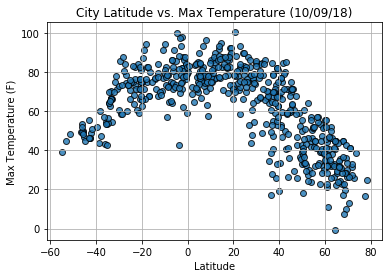

In [6]:
# Build scatter plot for latitude vs temperature
plt.scatter(lats, 
            max_temps,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

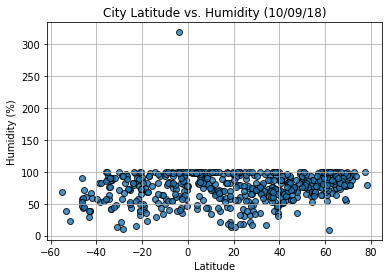

In [7]:
# Build scatter plots for each city types
plt.scatter(lats, 
            humidity,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

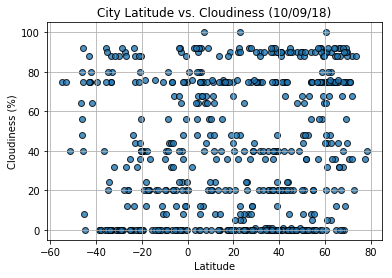

In [8]:
# Build scatter plots for each city types
plt.scatter(lats, 
            cloudiness,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

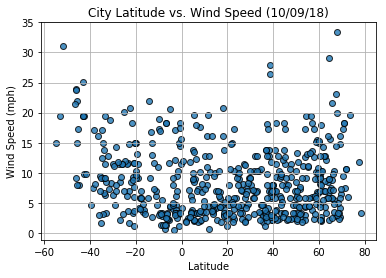

In [9]:
# Build scatter plots for each city type
plt.scatter(lats, 
            wind_speed,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()